7. In Section 8.3.3, we applied random forests to the Boston data using
max_features = 6 and using n_estimators = 100 and n_estimators = 500. Create a plot displaying the test error resulting from random
forests on this data set for a more comprehensive range of values
for max_features and n_estimators. You can model your plot after
Figure 8.10. Describe the results obtained.

In [49]:
from IPython.display import Image

In [50]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS


In [51]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART


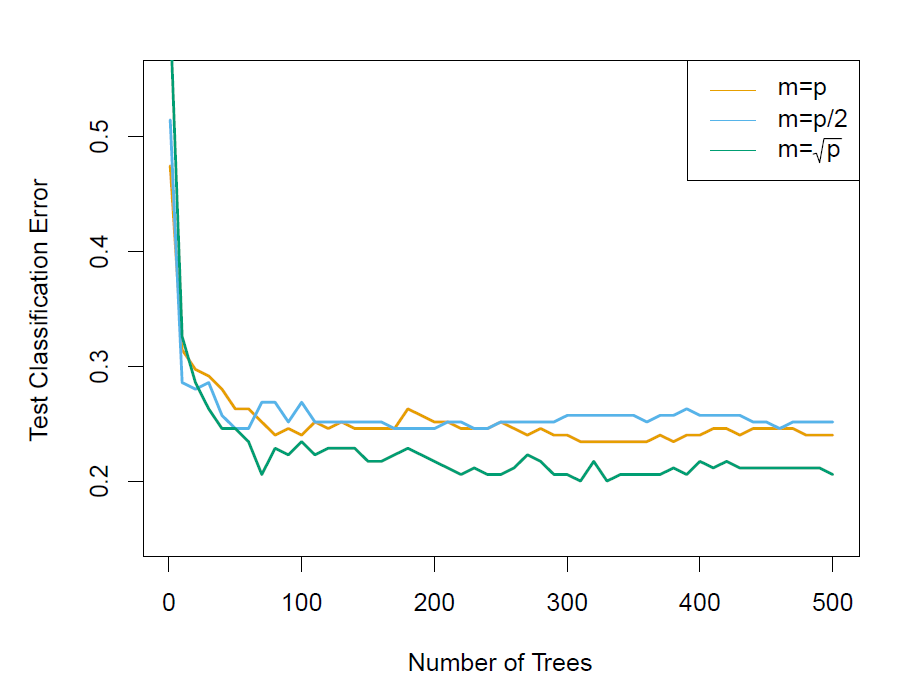

In [52]:
Image('E:\\CSDIY\\An Introduction to Statistical Learning with Python\\EX\\Snipaste_2024-08-03_19-49-57.png')

In [53]:
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)


In [54]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                Boston['medv'],
                                test_size=0.3,
                                random_state=0)


In [55]:
bag_boston = RF(max_features=X_train.shape[1], random_state=0)
bag_boston.fit(X_train, y_train)


RandomForestRegressor(max_features=12, random_state=0)

14.634700151315787

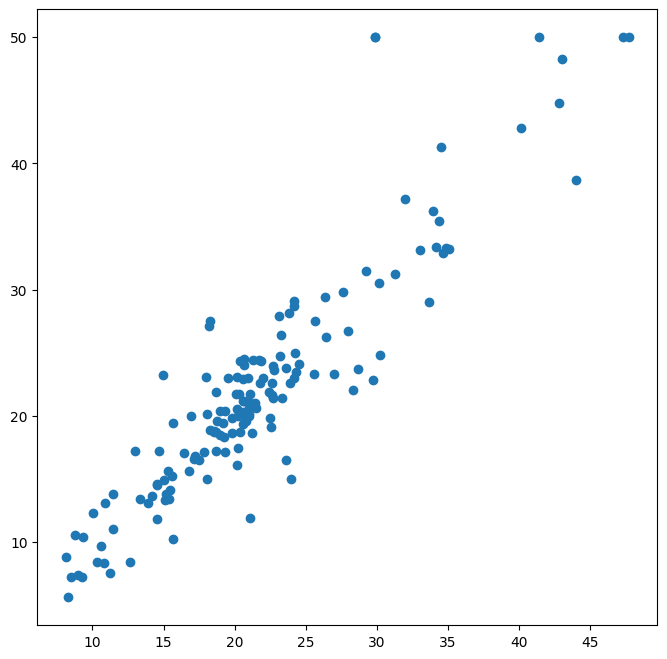

In [56]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag, y_test)
np.mean((y_test - y_hat_bag)**2)


In [57]:
bag_boston = RF(max_features=X_train.shape[1],
                n_estimators=500,
                random_state=0).fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

14.605662565263161

In [58]:
RF_boston = RF(max_features=6,
               random_state=0).fit(X_train, y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test - y_hat_RF)**2)


20.04276446710527

In [59]:
TestError = []
for i in range(300):
    my_rf_boston = RF(max_features=X_train.shape[1],
                n_estimators= i+1,
                random_state=0).fit(X_train, y_train)
    # y_hat_bag = bag_boston.predict(X_test) # cao 原来是这里写错了！
    y_hat_bag = my_rf_boston.predict(X_test)
    TestError.append(np.mean((y_test - y_hat_bag)**2))

8. In the lab, a classification tree was applied to the Carseats data set after
converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.

In [60]:
TestError_arr = np.array(TestError).T

In [61]:
TestError_arr

array([25.48480263, 13.78490132, 16.40299708, 16.57441612, 17.75678684,
       18.53563231, 18.5981297 , 18.25207031, 18.45135721, 18.90968355,
       19.34271422, 17.1628125 , 17.69528496, 17.68152625, 16.14886053,
       16.41494346, 15.46018803, 15.51795565, 15.61656601, 15.91865691,
       16.05503058, 16.08397116, 15.67992488, 15.89098056, 15.35211063,
       15.54998715, 15.64611806, 15.31670172, 15.43604145, 15.66843991,
       15.79824018, 15.82841   , 15.49842486, 15.50717942, 15.18071284,
       15.12078049, 15.34165276, 15.51058126, 15.60482716, 15.68208306,
       15.73294769, 15.80830689, 15.53665303, 15.32771619, 15.11100279,
       14.88850183, 14.66684681, 14.5080722 , 14.58923568, 14.67481842,
       14.70152697, 14.75495876, 14.54752487, 14.58143397, 14.63439039,
       14.81505362, 14.76717105, 14.80195501, 14.62215881, 14.37995515,
       14.41441608, 14.4948455 , 14.38143159, 14.43149962, 14.5021829 ,
       14.55654972, 14.46432376, 14.407645  , 14.42852813, 14.27

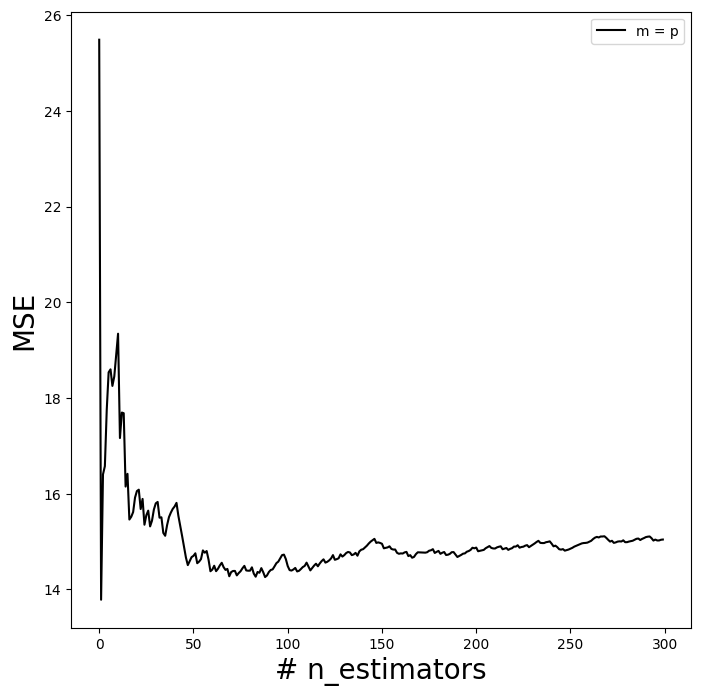

In [76]:
mse_fig, ax = subplots(figsize=(8,8))
# insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
# n_steps = insample_mse.shape[0]
n_steps = 300
ax.plot(
    np.arange(n_steps),
        # range(50),
        # np.array(range(51)),
        TestError_arr,
        'k', # color black
        label='m = p')
ax.set_ylabel('MSE',
              fontsize=20)
ax.set_xlabel('# n_estimators',
              fontsize=20)
# ax.set_xticks(np.arange(n_steps)[::2])
ax.set_xticks(np.arange(0, n_steps + 1, 50))
# 原来这是修改X轴坐标间隔的地方
ax.legend()
# ax.set_ylim([50000,250000]);

In [69]:
# np.arange()

In [70]:
X_train.shape

(354, 12)

In [72]:
TestError_6 = []
for i in range(300):
    my_rf_boston = RF(max_features=6,
                n_estimators= i+1,
                random_state=0).fit(X_train, y_train)
    # y_hat_bag = bag_boston.predict(X_test) # cao 原来是这里写错了！
    y_hat_bag = my_rf_boston.predict(X_test)
    TestError_6.append(np.mean((y_test - y_hat_bag)**2))

In [73]:
TestError_6_arr = np.array(TestError_6).T

In [77]:
ax.plot(
    np.arange(n_steps),
        # range(50),
        # np.array(range(51)),
        TestError_6_arr,
        'r', # color black
        label='m = p/2')
ax.set_ylabel('MSE',
              fontsize=20)
ax.set_xlabel('# n_estimators',
              fontsize=20)
# ax.set_xticks(np.arange(n_steps)[::2])
ax.set_xticks(np.arange(0, n_steps + 1, 50))
# 原来这是修改X轴坐标间隔的地方
ax.legend()
# ax.set_ylim([50000,250000]);

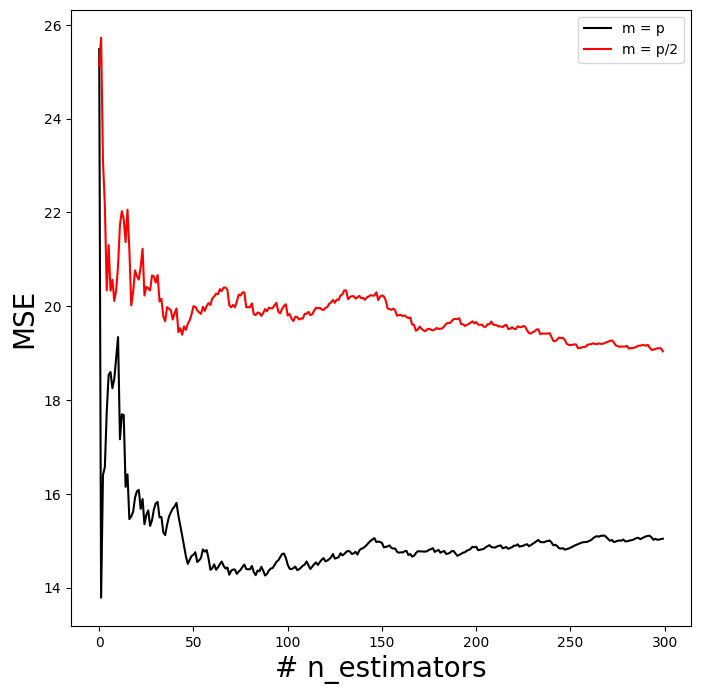

In [78]:
mse_fig

In [81]:
TestError_3 = []
for i in range(300):
    my_rf_boston = RF(max_features=3,
                n_estimators= i+1,
                random_state=0).fit(X_train, y_train)
    # y_hat_bag = bag_boston.predict(X_test) # cao 原来是这里写错了！
    y_hat_bag = my_rf_boston.predict(X_test)
    TestError_3.append(np.mean((y_test - y_hat_bag)**2))
    

In [82]:
TestError_3_arr = np.array(TestError_3).T

In [85]:
ax.plot(
    np.arange(n_steps),
        # range(50),
        # np.array(range(51)),
        TestError_3_arr,
        'b', # color black
        label='m = sqrt(p)')
ax.set_ylabel('MSE',
              fontsize=20)
ax.set_xlabel('# n_estimators',
              fontsize=20)
# ax.set_xticks(np.arange(n_steps)[::2])
ax.set_xticks(np.arange(0, n_steps + 1, 50))
# 原来这是修改X轴坐标间隔的地方
ax.legend()
# ax.set_ylim([50000,250000]);

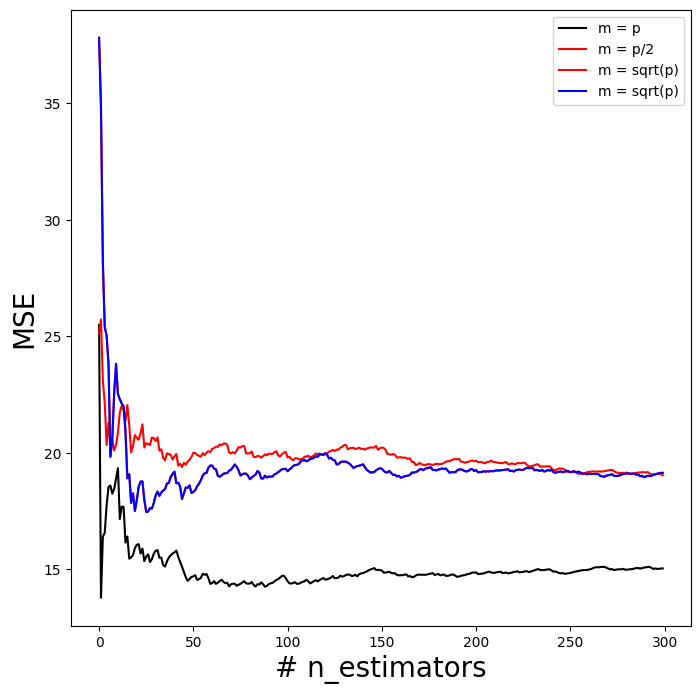

In [87]:
mse_fig